In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [3]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [4]:
results = [parse_file(f) for f in files]

In [5]:
df = pd.DataFrame(results)
df = df.astype('float')

In [6]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.280000,1.000000,0.437500,9.957204e+00,57.318423,2.539610e+01,1.465071e+04,121.040126,75.372407,910.438361,3.765916e+00,1.940287e+00,20.0,0.20
1,0.318182,1.000000,0.482759,3.760145e+00,21.645191,6.966439e+00,2.597825e+03,50.968866,34.250287,348.327196,6.677622e-01,8.170369e-01,8.0,0.14
2,1.000000,1.000000,1.000000,4.515336e-07,0.000003,7.966897e-07,1.391820e-09,0.000037,0.000027,0.000146,3.577627e-13,5.980373e-07,0.0,0.10
3,0.260870,0.857143,0.400000,7.486763e-01,4.309739,2.255003e+00,1.848477e+03,42.993915,22.114084,412.406584,4.751447e-01,6.891975e-01,18.0,0.10
4,0.352941,0.857143,0.500000,1.652216e+00,9.510946,3.991663e+00,4.116363e+04,202.888231,101.283570,1397.879080,1.058097e+01,3.252322e+00,20.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.666667,0.857143,0.750000,3.821760e-01,2.199988,7.844944e-01,9.101071e+01,9.539953,6.514384,42.589479,2.339399e-02,1.529266e-01,18.0,0.04
106,0.260870,0.857143,0.400000,4.249542e+00,24.462396,1.104463e+01,1.128809e+04,106.245421,51.726461,760.874132,2.901565e+00,1.703127e+00,6.0,0.20
107,1.000000,1.000000,1.000000,4.180055e-07,0.000002,7.105830e-07,2.190808e-10,0.000015,0.000010,0.000104,5.631397e-14,2.372678e-07,0.0,0.12
108,0.500000,1.000000,0.666667,6.971226e-01,4.012971,1.701959e+00,2.411649e+02,15.529484,10.999060,76.097240,6.199061e-02,2.489394e-01,16.0,0.12


<Axes: xlabel='noise', ylabel='dt'>

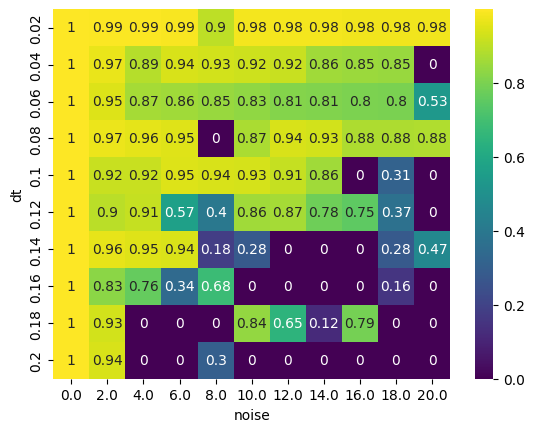

In [7]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

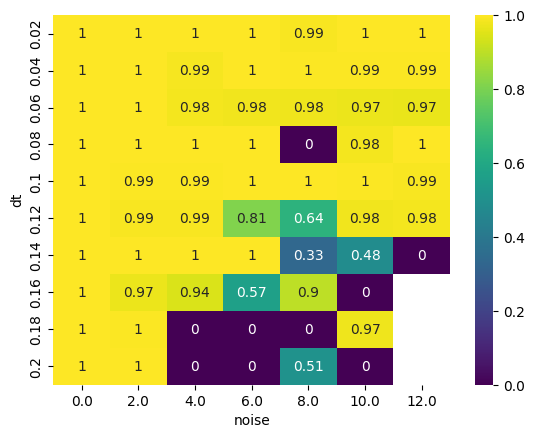

In [52]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

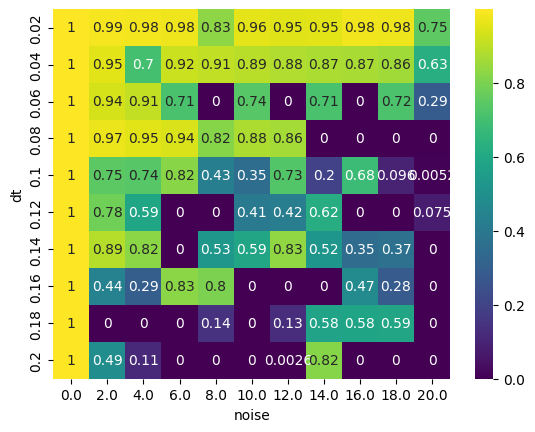

In [9]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
